# Time Series Talk : Augmented Dickey Fuller Test + Code

https://www.youtube.com/watch?v=1opjnegd_hA

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

In [23]:
def generate_ar_process(lags, coefs, length):
    
    #cast coefs to np array
    coefs = np.array(coefs)
    
    #initial values
    series = [np.random.normal() for _ in range(lags)]
    
    for _ in range(length):
        #get previous values of the series, reversed
        prev_vals = series[-lags:][::-1]
        
        #get new value of time series
        new_val = np.sum(np.array(prev_vals) * coefs) + np.random.normal()
        
        series.append(new_val)
        
    return np.array(series)

In [24]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("✅ The series is likely stationary.")
    else:
        print("❌ The series is likely non-stationary.")

# AR(1) Process

## Stationary

Text(0.5, 1.0, 'Stationary AR(1) Process')

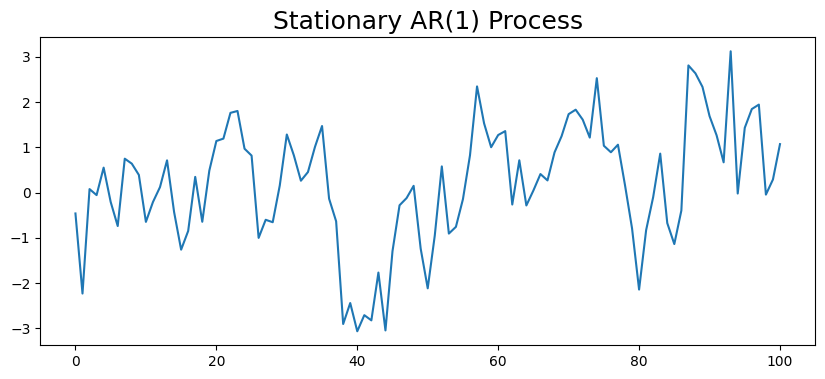

In [25]:
ar_1_process = generate_ar_process(1, [.5], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process)
plt.title('Stationary AR(1) Process', fontsize=18)

In [26]:
ar_1_process

array([-0.46298112, -2.23416612,  0.07618609, -0.05691279,  0.55097706,
       -0.20800043, -0.74112028,  0.74866625,  0.6383117 ,  0.38919452,
       -0.64915071, -0.21011679,  0.12016298,  0.71219928, -0.42996565,
       -1.26341668, -0.84966285,  0.3459487 , -0.64634156,  0.48399178,
        1.13953798,  1.19256041,  1.7621954 ,  1.80383557,  0.96900469,
        0.81723653, -1.00312728, -0.6028192 , -0.65677891,  0.15579245,
        1.28348502,  0.82206094,  0.26132783,  0.45299145,  1.01122245,
        1.47140765, -0.1361024 , -0.6360974 , -2.90803866, -2.44401745,
       -3.06871345, -2.71201355, -2.82731782, -1.77004621, -3.04974101,
       -1.2974278 , -0.28190476, -0.12229695,  0.14837442, -1.24009212,
       -2.11829686, -0.9530201 ,  0.57811464, -0.90787829, -0.75916802,
       -0.14603716,  0.82415689,  2.34707358,  1.53025688,  1.00225649,
        1.27205812,  1.3586406 , -0.26497472,  0.7128962 , -0.28588327,
        0.04568836,  0.40860111,  0.26802001,  0.88838914,  1.24

In [27]:
perform_adf_test(ar_1_process)

ADF Statistic: -4.230974
p-value: 0.000584
✅ The series is likely stationary.


## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(1) Process')

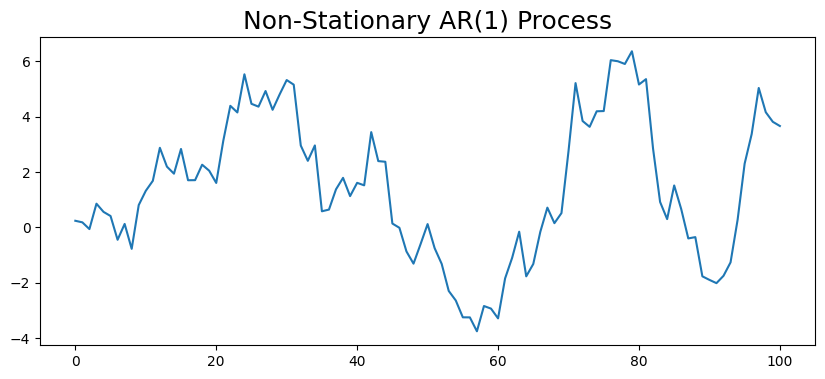

In [28]:
ar_1_process_unit_root = generate_ar_process(1, [1], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_1_process_unit_root)
plt.title('Non-Stationary AR(1) Process', fontsize=18)

In [29]:
perform_adf_test(ar_1_process_unit_root)

ADF Statistic: -2.143920
p-value: 0.227225
❌ The series is likely non-stationary.


# AR(2) Process

## Stationary

Text(0.5, 1.0, 'Stationary AR(2) Process')

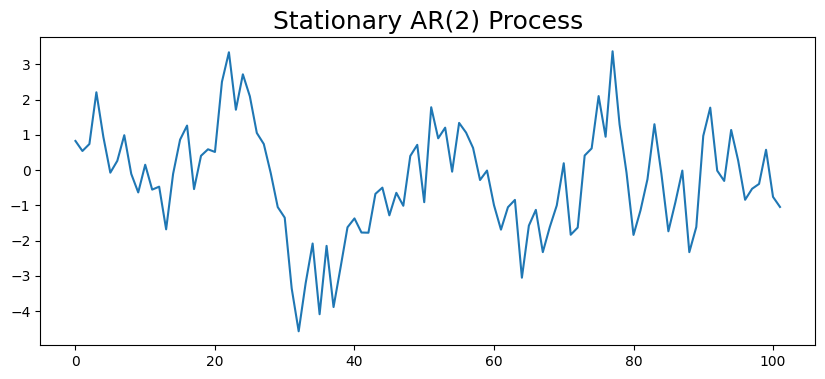

In [30]:
ar_2_process = generate_ar_process(2, [.5, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process)
plt.title('Stationary AR(2) Process', fontsize=18)

In [31]:
perform_adf_test(ar_2_process)

ADF Statistic: -4.223929
p-value: 0.000600
✅ The series is likely stationary.


## Non-Stationary

Text(0.5, 1.0, 'Non-Stationary AR(2) Process')

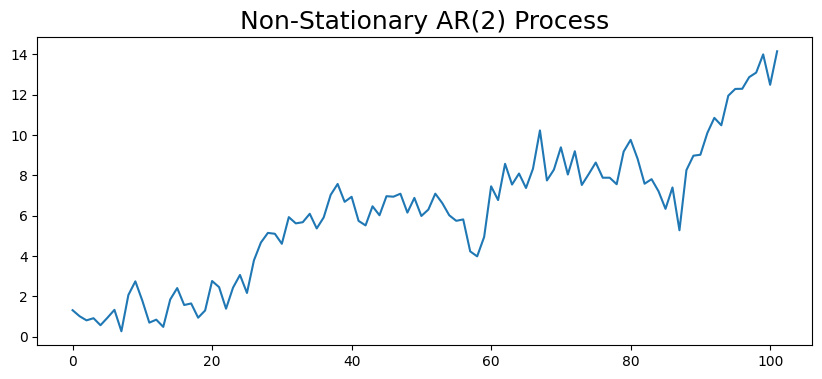

In [32]:
ar_2_process_unit_root = generate_ar_process(2, [.7, .3], 100)
plt.figure(figsize=(10,4))
plt.plot(ar_2_process_unit_root)
plt.title('Non-Stationary AR(2) Process', fontsize=18)

In [33]:
perform_adf_test(ar_2_process_unit_root)

ADF Statistic: -0.401210
p-value: 0.909897
❌ The series is likely non-stationary.


# Stock Example

In [34]:
import yfinance as yf
#define the ticker symbol
tickerSymbol = 'TSLA'

#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

#get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-1-1', end='2025-9-12')

tickerDf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,0.0,0.0
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.0,0.0
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.0,0.0
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,0.0,0.0
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-05 00:00:00-04:00,348.000000,355.869995,344.679993,350.839996,108989800,0.0,0.0
2025-09-08 00:00:00-04:00,354.640015,358.440002,344.839996,346.399994,75208300,0.0,0.0
2025-09-09 00:00:00-04:00,348.440002,350.769989,343.820007,346.970001,53816000,0.0,0.0


In [35]:

tickerDf = tickerDf[['Close']]

#see your data
tickerDf.head()

,Close
Date,
2020-01-02 00:00:00-05:00,28.684000
2020-01-03 00:00:00-05:00,29.534000
2020-01-06 00:00:00-05:00,30.102667
2020-01-07 00:00:00-05:00,31.270666
2020-01-08 00:00:00-05:00,32.809334


In [36]:
import plotly.express as px

fig = px.line(tickerDf)
fig.show()

In [37]:
close_values = tickerDf['Close'].values
close_values
perform_adf_test(close_values)

ADF Statistic: -2.653987
p-value: 0.082344
❌ The series is likely non-stationary.


In [38]:
#take first difference
first_diffs = tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs = np.concatenate([first_diffs, [0]])

#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

tickerDf.head()

/var/folders/lb/ycbntly138n0xkt0fdrnnk_w0000gn/T/ipykernel_82603/3577106435.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Close,FirstDifference
Date,,
2020-01-02 00:00:00-05:00,28.684000,0.850000
2020-01-03 00:00:00-05:00,29.534000,0.568666
2020-01-06 00:00:00-05:00,30.102667,1.167999
2020-01-07 00:00:00-05:00,31.270666,1.538668
2020-01-08 00:00:00-05:00,32.809334,-0.720001


In [39]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

# Assuming tickerDf is your DataFrame with the provided data
# Create a subplot figure with 2 rows and 1 column, sharing the x-axis
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    vertical_spacing=0.1,
                    subplot_titles=("Close Price", "First Difference"))

# Add trace for Close price (first subplot)
fig.add_trace(
    go.Scatter(x=tickerDf.index, y=tickerDf['Close'], mode='lines', name='Close'),
    row=1, col=1
)

# Add trace for FirstDifference (second subplot)
fig.add_trace(
    go.Scatter(x=tickerDf.index, y=tickerDf['FirstDifference'], mode='lines', name='First Difference'),
    row=2, col=1
)

# Update layout for better appearance
fig.update_layout(
    height=600,
    width=1000,
    title_text="Close Price and First Difference Over Time",
    showlegend=True
)

# Update x-axis and y-axis titles
fig.update_xaxes(title_text="Date", row=2, col=1)  # Only set x-axis title for the bottom subplot
fig.update_yaxes(title_text="Close Price", row=1, col=1)
fig.update_yaxes(title_text="First Difference", row=2, col=1)

# Show the figure
fig.show()

In [40]:
close_values = tickerDf['FirstDifference'].values
close_values
perform_adf_test(close_values)

ADF Statistic: -6.699006
p-value: 0.000000
✅ The series is likely stationary.


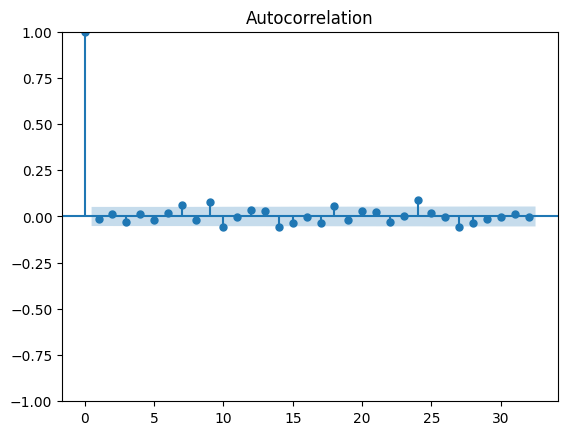

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(tickerDf.FirstDifference)

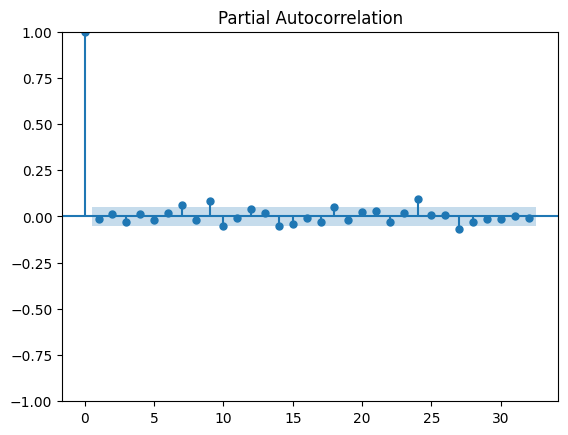

In [42]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)